<a href="https://colab.research.google.com/github/NasserMohamedEid/Text-AI-Detection/blob/main/AraBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install packaging

In [ ]:
!pip install pandas transformers simpletransformers==0.41 amp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.6/191.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 77.4 MB/s eta 0:

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 9.8 MB/s eta 0:00:00
  Using cached seqeval-1.2.2-py3-none-any.whl
  Using cached tensorboardX-2.6.2.2-py2.py3-none-any.whl (101 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 43.4 MB/s eta 0:00:00
  Using cached sentencepiece-0.1.99-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/

In [ ]:
pip install torch torchvision torchaudio

In [ ]:
import sys
train_data_path = "/content/drive/MyDrive/Graduation_Project_Ottawa/datasets/arabic/arabic_train_test/arabic_train.csv"
test_data_path="/content/drive/MyDrive/Graduation_Project_Ottawa/datasets/arabic/arabic_train_test/arabic_test.csv"
# sys.path.insert(0, train_data)

random_state = 523

In [ ]:
import pandas as pd
train_data=pd.read_csv(train_data_path)
test_data=pd.read_csv(test_data_path)

In [ ]:
train_data

,text,topic,label,model
0,"""يعيش النقد العربي حالة من الركود والتخبط، وتغ...",Culture,1,bard
1,يعدُّ الكاتب الإماراتي سعيد عبدالله، من عداد ا...,Culture,1,bard
2,يحقق سوق برامج التطبيق للشركات نمواً هاماً في ...,Tech,0,human
3,يلعب الساعة الثالثة والنصف من عصر اليوم منتخبا...,Sports,0,human
4,الشارقة: «الخليج» بمشاركة حوالي 150 فارساً وفا...,Medical,0,human
...,...,...,...,...
26814,سينظم المركز الوطني للوثائق والبحوث بوزارة شؤو...,mixed,1,gpt3.5
26815,كشفت هيئة الصحة دبي عن تلقي 400 شكوى خلال الفت...,mixed,1,gpt3.5
26816,"""أعلنت وزارة التربية والتعليم عن بدء عملية الت...",Finance,1,bard
26817,دبي «الخليج»: تعرض هيئة التأمين في معرض جيتكس ...,Tech,0,human


In [ ]:
train=train_data.drop(columns=["topic","model"])
test=test_data.drop(columns=["topic","model"])

In [ ]:
train

,text,label
0,"""يعيش النقد العربي حالة من الركود والتخبط، وتغ...",1
1,يعدُّ الكاتب الإماراتي سعيد عبدالله، من عداد ا...,1
2,يحقق سوق برامج التطبيق للشركات نمواً هاماً في ...,0
3,يلعب الساعة الثالثة والنصف من عصر اليوم منتخبا...,0
4,الشارقة: «الخليج» بمشاركة حوالي 150 فارساً وفا...,0
...,...,...
26814,سينظم المركز الوطني للوثائق والبحوث بوزارة شؤو...,1
26815,كشفت هيئة الصحة دبي عن تلقي 400 شكوى خلال الفت...,1
26816,"""أعلنت وزارة التربية والتعليم عن بدء عملية الت...",1
26817,دبي «الخليج»: تعرض هيئة التأمين في معرض جيتكس ...,0


In [ ]:
from simpletransformers.classification import ClassificationModel
arabert_model_name = "aubmindlab/bert-base-arabertv2"
model = ClassificationModel('bert',model_name=arabert_model_name , args={'fp16': False, 'num_train_epochs': 3, "overwrite_output_dir":True}) # You can set class weights by using the optional weight argument

model.train_model(train)

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:611: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/26819 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/3353 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/3353 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/3353 [00:00<?, ?it/s]

(10059, 0.1787281687841858)

In [ ]:
import sklearn
result, model_outputs, wrong_predictions = model.eval_model(test, acc=sklearn.metrics.accuracy_score, f1=sklearn.metrics.f1_score)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6705 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/839 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.8452469290379937,
 'tp': 3253,
 'tn': 2919,
 'fp': 434,
 'fn': 99,
 'auroc': 0.9873511200385504,
 'auprc': 0.9897356048320106,
 'acc': 0.9205070842654736,
 'f1': 0.9242790169058105,
 'eval_loss': 0.40416614052884187}

In [ ]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)
# Save the serialized model to a file
with open('/content/drive/MyDrive/Graduation_Project_Ottawa/models/AraBert_all.pkl', 'wb') as model_file:
    model_file.write(saved_model)

In [ ]:
predictions = model.predict(test["text"].tolist())[0]

  0%|          | 0/6705 [00:00<?, ?it/s]

  0%|          | 0/839 [00:00<?, ?it/s]

In [ ]:
predictions

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
from simpletransformers.classification import ClassificationModel
arabert_model_name = "aubmindlab/bert-large-arabertv2"
model2 = ClassificationModel('bert',model_name=arabert_model_name , args={'fp16': False, 'num_train_epochs': 3, "overwrite_output_dir":True}) # You can set class weights by using the optional weight argument

model2.train_model(train_data)

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.48G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-large-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/656k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:611: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/11744 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1468 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/1468 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/1468 [00:00<?, ?it/s]

(4404, 0.15568628268800513)

In [ ]:
import sklearn
result, model_outputs, wrong_predictions = model2.eval_model(test_data, acc=sklearn.metrics.accuracy_score, f1=sklearn.metrics.f1_score)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2936 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/367 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.9464543251857556,
 'tp': 1446,
 'tn': 1411,
 'fp': 57,
 'fn': 22,
 'auroc': 0.996614190839638,
 'auprc': 0.9969591329883137,
 'acc': 0.9730926430517711,
 'f1': 0.9734096263884214,
 'eval_loss': 0.14830044606070167}

In [ ]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(model2)
# Save the serialized model to a file
with open('/content/drive/MyDrive/Graduation_Project_Ottawa/models/AraBertV2_large.pkl', 'wb') as model_file:
    model_file.write(saved_model)

In [ ]:
new_predict=test_data

In [ ]:
new_predict["predictions"]=predictions

In [ ]:
new_predict

,text,topic,label,model,predictions
0,"""حافظ سوق أبوظبي للأوراق المالية على ارتفاعه أ...",Finance,1,bard,1
1,في معظم الأحيان يبدو الكمبيوتر المحمول مثل أغل...,Tech,0,human,0
2,تمكنت أسواق الأسهم المحلية من الصعود مجدداً أم...,Finance,0,human,0
3,دعت دائرة صحة أبوظبي جميع سكان الإمارة للاستفا...,mixed,1,gpt3.5,1
4,أعلنت ويسترن ديجيتال اليوم أنها قد بدأت بشحن ك...,Tech,0,human,1
...,...,...,...,...,...
6700,أعلنت شركة ديار للتطوير العقاري، عن النتائج ال...,Finance,0,human,0
6701,متابعة: ضمياء فالح يعيش الكوستاريكي كيلور نافا...,Sports,0,human,0
6702,إلى جانب القبور والمبنى الديني الرئيسي، تم اكت...,Religion,1,bard,0
6703,صعد مؤشر سوق أبوظبي للأوراق المالية 27 .56 نقط...,Finance,0,human,0


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
topic_error_ratio = new_predict.groupby('topic').apply(lambda group: 1.0 - accuracy_score(group['label'], group['predictions']))
print("Error Ratio by topic:")
print(type_error_ratio)



# Calculate error ratio for every topic
model_error_ratio = new_predict.groupby('model').apply(lambda group: 1.0 - accuracy_score(group['label'], group['predictions']))
print("\nError Ratio by model:")
print(topic_error_ratio)

Error Ratio by topic:
topic
Culture     0.111965
Finance     0.081952
Medical     0.079167
Politics    0.068465
Religion    0.106576
Sports      0.067729
Tech        0.145434
mixed       0.009492
dtype: float64

Error Ratio by model:
topic
Culture     0.111965
Finance     0.081952
Medical     0.079167
Politics    0.068465
Religion    0.106576
Sports      0.067729
Tech        0.145434
mixed       0.009492
dtype: float64


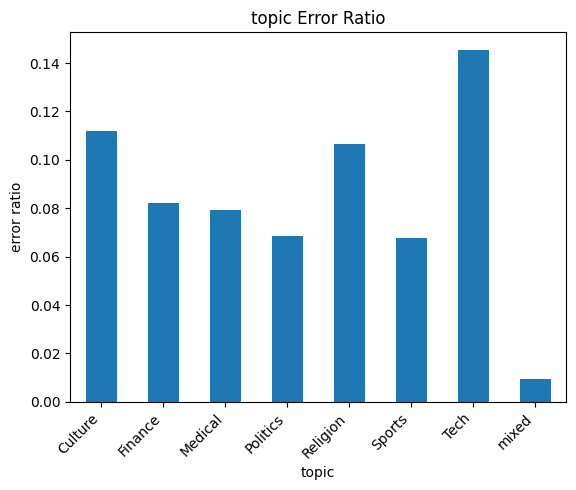

In [ ]:
ax = topic_error_ratio.plot(kind='bar', x='topic', y='value', legend=False)
ax.set_ylabel('error ratio')
ax.set_title('topic Error Ratio')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

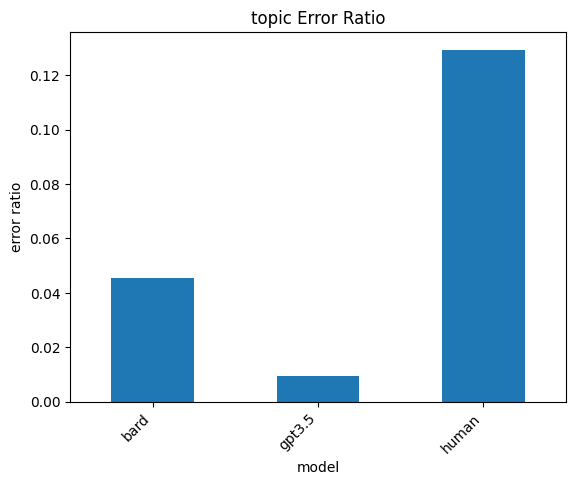

In [ ]:
ax =model_error_ratio.plot(kind='bar', x='model', y='value', legend=False)
ax.set_ylabel('error ratio')
ax.set_title('topic Error Ratio')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()